<a href="https://colab.research.google.com/github/williamfazle/Machine-Learning/blob/main/Polynomial_Regression_for_Position_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [21]:
# Load dataset
df = pd.read_csv("/content/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [22]:
# Basic cleaning
df = df.drop_duplicates()

In [23]:
# Features and target
X = df.iloc[:, 1:2].values   # Level
y = df.iloc[:, 2].values     # Salary

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Scaling (important for polynomial regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Polynomial transformation (degree=4 recommended)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [27]:
# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [28]:
# Prediction
y_pred = model.predict(X_test_poly)

In [29]:
# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.971466680384177
Mean Squared Error: 1444499305.5510345


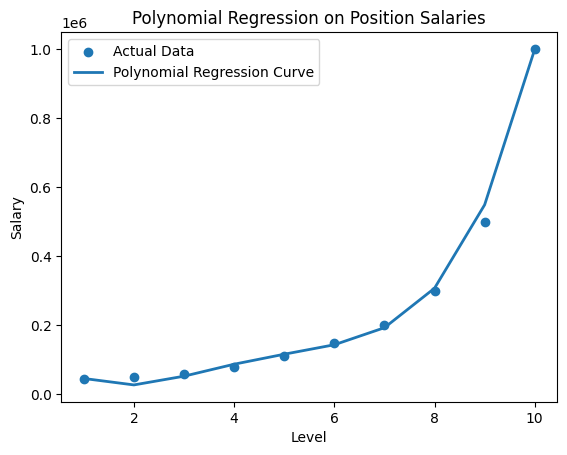

In [30]:
# Visualization: full curve
X_curve = scaler.transform(X)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_curve, linewidth=2, label="Polynomial Regression Curve")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression on Position Salaries")
plt.legend()
plt.show()